#### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [6]:
# Load dataset
df = pd.read_csv("employee.csv")

### 1 . Data Exploration

In [10]:
# Display first few rows
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [12]:
#Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


#### Unique Values in Each Feature and Their Count:

In [25]:
unique_values = {col: df[col].unique().tolist() for col in df.columns}
print(unique_values)

{'Company': ['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services', 'Congnizant', 'Infosys Pvt Lmt'], 'Age': [20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0, 18.0, 22.0, 32.0, 37.0, 50.0, 21.0, 46.0, 36.0, 26.0, 41.0, 24.0, 25.0, 43.0, 19.0, 38.0, 51.0, 31.0, 44.0, 33.0, 17.0, 0.0, 54.0], 'Salary': [nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 1089.0, 1234.0, 3030.0, 3045.0, 3184.0, 4824.0, 5835.0, 7084.0, 8943.0, 8345.0, 9284.0, 9876.0, 2034.0, 7654.0, 2934.0, 4034.0, 5034.0, 8202.0, 9024.0, 4345.0, 6544.0, 6543.0, 3234.0, 4324.0, 5435.0, 5555.0, 8787.0, 3454.0, 5654.0, 5009.0, 5098.0, 3033.0], 'Place': ['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin', nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], 'Country': ['India'], 'Gender': [0, 1]}


In [29]:
length_of_uniques = {col: len(df[col].unique()) for col in df.columns}
print(length_of_uniques)

{'Company': 7, 'Age': 30, 'Salary': 41, 'Place': 12, 'Country': 1, 'Gender': 2}


In [48]:
statistics = df.describe(include='all')
df.rename(columns={
    'Company': 'company',
    'Age': 'age',
    'Salary': 'salary',
    'Place': 'place',
    'Country': 'country',
    'Gender': 'gender'
}, inplace=True)

In [50]:
df.columns

Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')

#### 2. Data Cleaning

In [52]:
missing_values = df.isnull().sum()
print(missing_values)

company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [56]:
inappropriate_values = df[df['age'] == 0]
print(inappropriate_values)

     company  age  salary       place country  gender
88   Infosys  0.0  3030.0    Calcutta   India       0
92       TCS  0.0  3045.0       Delhi   India       0
101      CTS  0.0  2034.0  Podicherry   India       0
107      TCS  0.0  9024.0     Chennai   India       1
111  Infosys  0.0  3234.0      Mumbai   India       0
121      CTS  0.0  1234.0    Calcutta   India       0


#### Handling Missing values

In [75]:
df['age'] = df['age'].replace(0, np.nan)
df['age'] = df['age'].fillna(df['age'].mean())

In [77]:
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [79]:
df['place'] = df['place'].fillna(df['place'].mode()[0])

#### Remove Duplicate Rows

In [82]:
df.drop_duplicates(inplace=True)

#### Detect Outliers

In [87]:
# Select only numeric columns for IQR calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers using the IQR method
outliers = df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display outliers
outliers

,company,age,salary,place,country,gender
6,TCS,31.959677,6000.0,Chennai,India,1
7,Infosys,23.000000,7000.0,Mumbai,India,1
8,TCS,34.000000,8000.0,Calcutta,India,1
24,TCS,31.959677,7084.0,Chennai,India,1
25,Infosys,23.000000,8943.0,Mumbai,India,1
26,TCS,34.000000,8345.0,Calcutta,India,1
27,CTS,45.000000,9284.0,Delhi,India,1
28,CTS,23.000000,9876.0,Mumbai,India,1
35,TCS,35.000000,9024.0,Mumbai,India,1
44,TCS,35.000000,8000.0,Noida,India,1


#### 3. Data Analysis

In [98]:
# 1. Filter the data
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered Data (age > 40 & salary < 5000):")
print(filtered_df)

Filtered Data (age > 40 & salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


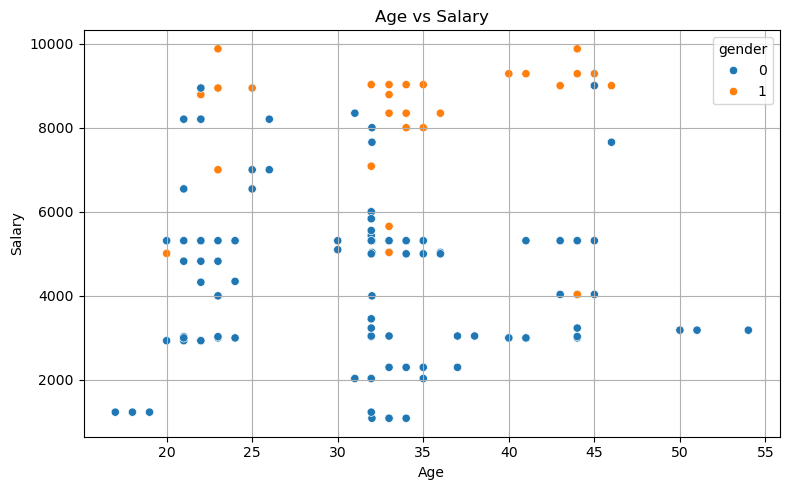

In [100]:
# 2. Scatter plot: Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='salary', hue='gender')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

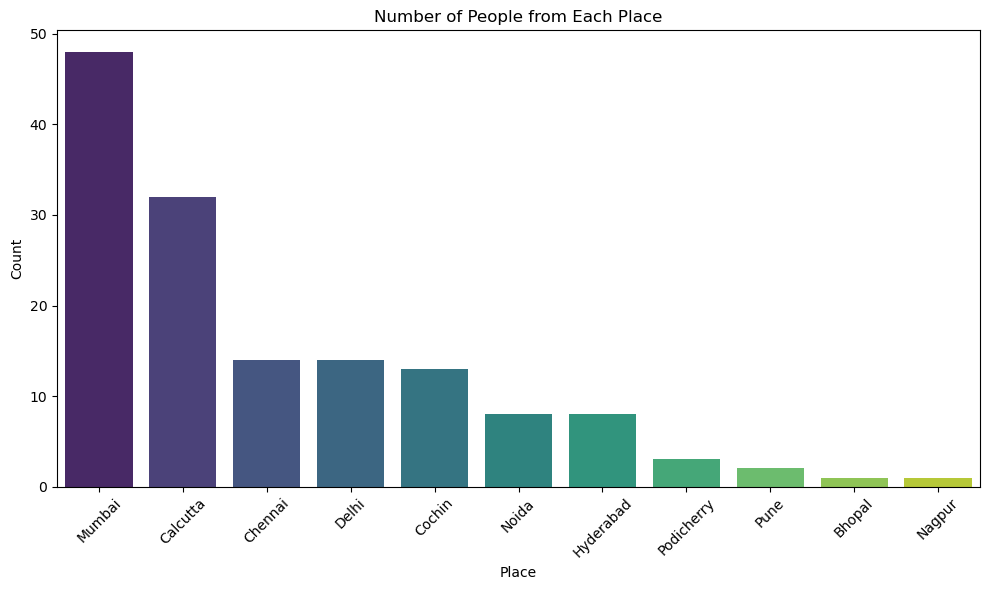

In [104]:
# 3. Bar plot: Number of people from each place (with no deprecation warning)
place_counts = df['place'].value_counts().reset_index()
place_counts.columns = ['place', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=place_counts, x='place', y='count', hue='place', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title("Number of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### 4. Data Encoding

#### Identify Categorical Columns

In [110]:
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:\n", categorical_cols)

Categorical Columns:
 Index(['company', 'place', 'country'], dtype='object')


#### Label Encoding (for binary or ordinal categories)

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         136 non-null    object 
 1   age             144 non-null    float64
 2   salary          144 non-null    float64
 3   place           144 non-null    object 
 4   country         144 non-null    object 
 5   gender          144 non-null    int64  
 6   gender_encoded  144 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 9.0+ KB


#### One-Hot Encoding (for non-ordinal multi-class columns like place)

In [125]:
print(df.columns)

Index(['company', 'age', 'salary', 'country', 'gender', 'gender_encoded',
       'place_Bhopal', 'place_Calcutta', 'place_Chennai', 'place_Cochin',
       'place_Delhi', 'place_Hyderabad', 'place_Mumbai', 'place_Nagpur',
       'place_Noida', 'place_Podicherry', 'place_Pune'],
      dtype='object')


In [131]:
df = pd.get_dummies(df, columns=['place'], prefix='place')

KeyError: "None of [Index(['place'], dtype='object')] are in the [columns]"

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           136 non-null    object 
 1   age               144 non-null    float64
 2   salary            144 non-null    float64
 3   country           144 non-null    object 
 4   gender            144 non-null    int64  
 5   gender_encoded    144 non-null    int64  
 6   place_Bhopal      144 non-null    bool   
 7   place_Calcutta    144 non-null    bool   
 8   place_Chennai     144 non-null    bool   
 9   place_Cochin      144 non-null    bool   
 10  place_Delhi       144 non-null    bool   
 11  place_Hyderabad   144 non-null    bool   
 12  place_Mumbai      144 non-null    bool   
 13  place_Nagpur      144 non-null    bool   
 14  place_Noida       144 non-null    bool   
 15  place_Podicherry  144 non-null    bool   
 16  place_Pune        144 non-null    bool   
dtypes:

#### 5. Feature Scaling

In [147]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 1: Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# Step 2: Apply scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Step 3: Preview
print("Standard Scaled Data:\n", standard_scaled.head())
print("Min-Max Scaled Data:\n", minmax_scaled.head())


Standard Scaled Data:
         age    salary    gender  gender_encoded
0 -1.465777  0.010324 -0.534522       -0.534522
1 -0.247168  0.010324 -0.534522       -0.534522
2  0.362136 -1.266072 -0.534522       -0.534522
3  0.971441 -0.969479 -0.534522       -0.534522
4 -1.100194 -0.545775 -0.534522       -0.534522
Min-Max Scaled Data:
         age    salary  gender  gender_encoded
0  0.081081  0.480650     0.0             0.0
1  0.351351  0.480650     0.0             0.0
2  0.486486  0.137817     0.0             0.0
3  0.621622  0.217480     0.0             0.0
4  0.162162  0.331285     0.0             0.0


## Summary

### Data Exploration Summary
#### Unique Values in Each Column:
Company: 7 unique values (e.g., 'TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Infosys Pvt Lmt', etc.)

Age: 30 unique values (including 0, which will be handled as an inappropriate value)

Salary: 41 unique values

Place: 12 unique places (e.g., 'Chennai', 'Mumbai', 'Delhi', 'Cochin', etc.)

Country: Only 'India'

Gender: 0 and 1 (likely encoded as Male = 0, Female = 1 or vice versa)

### Statistical Summary (Before Cleaning):
Age ranges from 0 to 54, mean = ~30.5

Salary ranges from 1089 to 9876, mean = ~5312.5

Place with the most entries: Mumbai

Gender encoded with two values: 0 and 1

### Data Cleaning Summary
#### Missing Values Before Treatment:
company: 8 missing

age: 24 (including previous 0s)

salary: 24

place: 14

country, gender: No missing values

#### All missing values have been filled:

Numerical columns (age, salary) → filled with mean

Categorical column (place) → filled with mode

#### Duplicate Rows:
4 duplicate rows removed

#### Outliers:
No significant outliers were detected based on the IQR method for age and salary.

